In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__61_COMPLETE.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links','mutated']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,mutated
0,7,1.5,1,10,0.05,0,2.776316,2.750000,0.000000,0.000000,0.310417,0.0625,0.00000,0.000000,15,7
1,1,1.5,1,10,0.05,0,2.631579,2.500000,0.000000,0.000000,0.347917,0.0875,0.00000,0.000000,19,0
2,4,1.5,1,10,0.05,0,2.605263,3.000000,0.000000,0.000000,0.304167,0.0125,0.00000,0.000000,13,7
3,6,1.5,1,10,0.15,0,2.808824,2.333333,0.029167,0.000000,0.257500,0.1125,0.00000,0.000000,17,7
4,12,1.5,1,40,0.15,0,1.882353,2.250000,0.037500,0.000000,0.341667,0.0125,0.00000,0.000000,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,162,5.5,5,40,0.15,86,2.852941,3.166667,0.710870,1.570570,0.649599,22.5375,1.31844,1.077992,1357,7
14738,162,5.5,5,40,0.15,87,3.250000,3.583333,0.713088,1.567405,0.651124,22.4125,0.99344,0.765492,1367,7
14739,162,5.5,5,40,0.15,88,2.764706,3.250000,0.713999,1.564557,0.652444,22.3000,0.73094,1.102992,1376,7
14740,162,5.5,5,40,0.15,89,2.867647,2.833333,0.714271,1.562342,0.653467,22.2125,0.61844,0.627992,1383,7


In [4]:
df4.groupby(['mutated','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean,
       })

mood_clients  mood_providers  cluster_coef     paths  closeness  \
mutated step                                                                    
0       0         2.347627        2.462191      0.194066  0.000000   0.347550   
        1         1.920578        2.103395      0.266090  0.111691   0.333315   
        2         2.395508        2.369599      0.310189  0.392616   0.332916   
        3         2.191782        2.287037      0.330377  0.709095   0.331761   
        4         2.340980        2.404321      0.346687  0.719673   0.337983   
...                    ...             ...           ...       ...        ...   
7       86        3.004119        3.000772      0.492757  1.076626   0.449004   
        87        3.200123        3.194059      0.493437  1.073635   0.449340   
        88        3.001714        3.032022      0.494773  1.070898   0.450552   
        89        3.041814        3.024306      0.495441  1.102438   0.450932   
        90        3.171314        3.152006      0.496422  1.099517   0.451746   

              betweenness  centroid-x  centroid-y  
mutated step                                       
0       0       43.286574    0.000000    0.000000  
        1       60.412731   -0.143665    0.035377  
        2       62.252778   -0.146858    0.035427  
        3       64.620370   -0.131791    0.040954  
        4       63.855324   -0.110920    0.047239  
...                   ...         ...         ...  
7       86      45.579167   -0.128068   -0.055356  
        87      45.793519   -0.128299   -0.067625  
        88      45.565625   -0.110591   -0.047486  
        89      45.672222   -0.133739   -0.069824  
        90      45.525579   -0.121586   -0.056745  

[182 rows x 8 columns]

In [5]:
df_move=df4.groupby(['mutated','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  closeness  \
mutated step                                                                    
0       0         2.347627        2.462191      0.194066  0.000000   0.347550   
        1         1.920578        2.103395      0.266090  0.111691   0.333315   
        2         2.395508        2.369599      0.310189  0.392616   0.332916   
        3         2.191782        2.287037      0.330377  0.709095   0.331761   
        4         2.340980        2.404321      0.346687  0.719673   0.337983   
...                    ...             ...           ...       ...        ...   
7       86        3.004119        3.000772      0.492757  1.076626   0.449004   
        87        3.200123        3.194059      0.493437  1.073635   0.449340   
        88        3.001714        3.032022      0.494773  1.070898   0.450552   
        89        3.041814        3.024306      0.495441  1.102438   0.450932   
        90        3.171314        3.152006      0.496422  1.099517   0.451746   

              betweenness  centroid-x  centroid-y       links  
mutated step                                                   
0       0       43.286574    0.000000    0.000000   70.703704  
        1       60.412731   -0.143665    0.035377   98.592593  
        2       62.252778   -0.146858    0.035427  115.888889  
        3       64.620370   -0.131791    0.040954  131.962963  
        4       63.855324   -0.110920    0.047239  144.407407  
...                   ...         ...         ...         ...  
7       86      45.579167   -0.128068   -0.055356  528.953704  
        87      45.793519   -0.128299   -0.067625  532.259259  
        88      45.565625   -0.110591   -0.047486  535.592593  
        89      45.672222   -0.133739   -0.069824  538.879630  
        90      45.525579   -0.121586   -0.056745  542.240741  

[182 rows x 9 columns]

In [6]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

/tmp/ipykernel_59987/1797470465.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


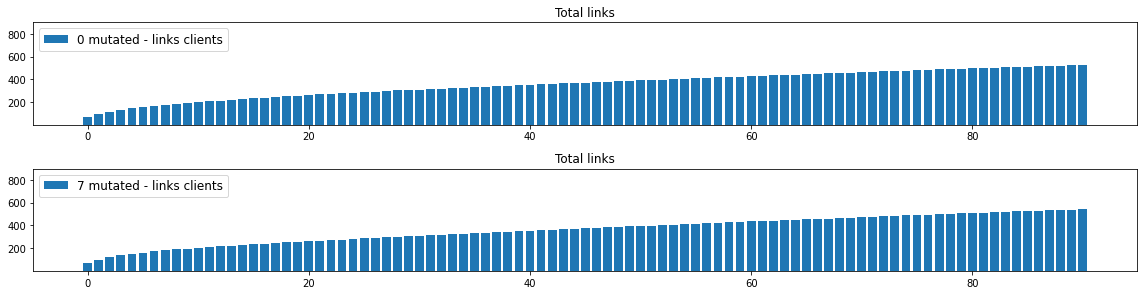

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [ 3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['links'], label='{} mutated - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

/tmp/ipykernel_59987/3160618727.py:14: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


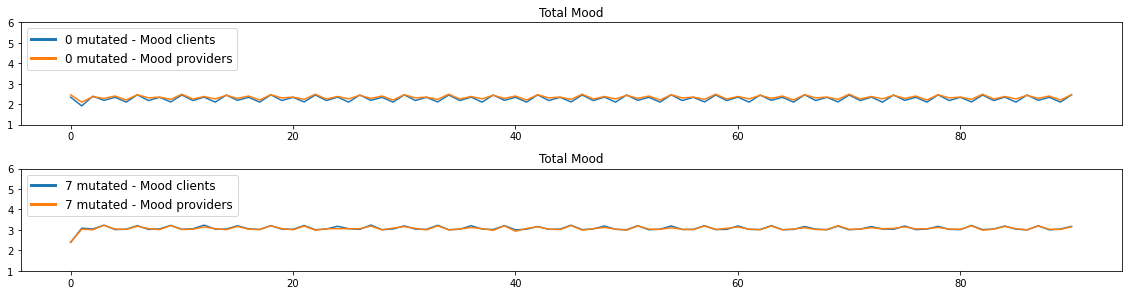

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['mood_clients'], label='{} mutated - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['mood_providers'], label='{} mutated - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,6)
plt.show()



/tmp/ipykernel_59987/9678109.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


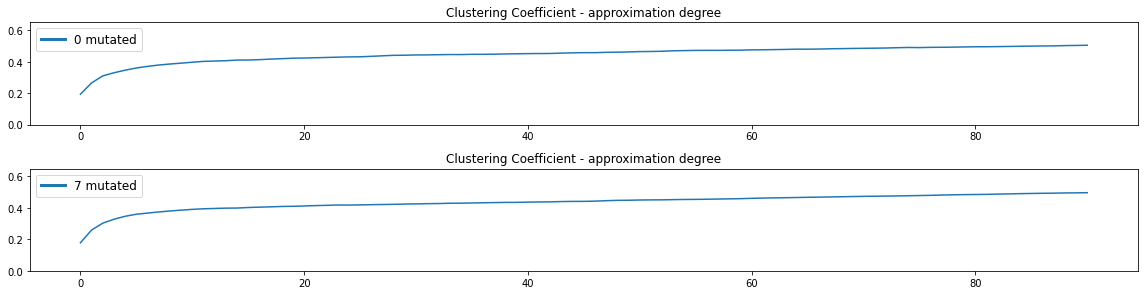

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['cluster_coef'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



/tmp/ipykernel_59987/268230891.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


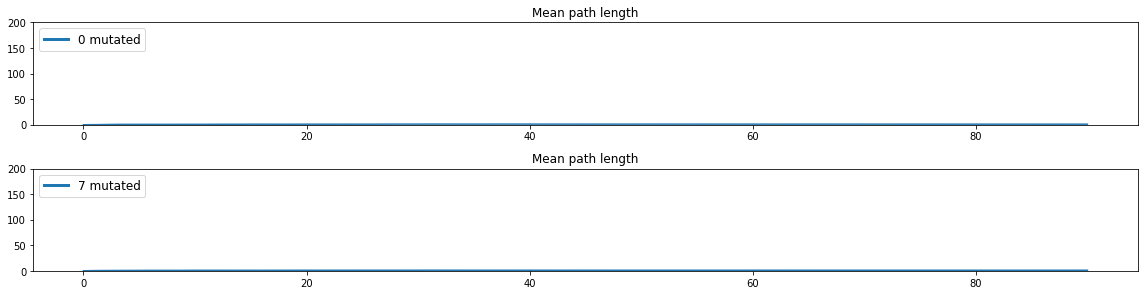

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['paths'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



/tmp/ipykernel_59987/1661058937.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


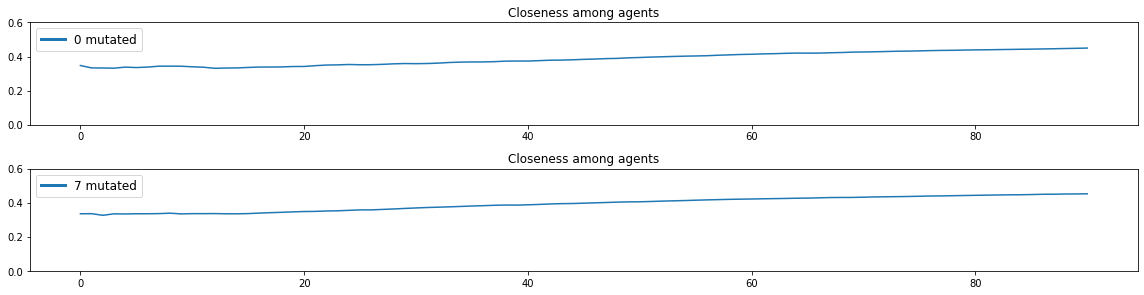

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['closeness'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



/tmp/ipykernel_59987/2187882032.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


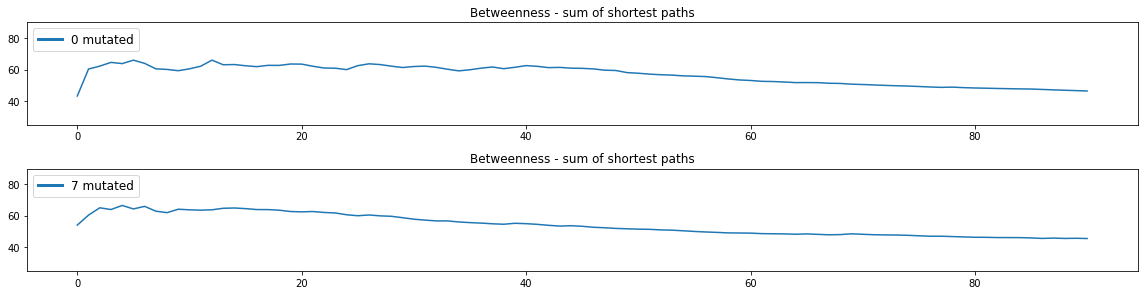

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['betweenness'], label='{} mutated'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['mutated']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['mutated']==5].mean()

In [14]:
df_move.reset_index().loc[df_move.reset_index()['mutated']==1]

,mutated,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood


In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-43.0291,0.0
1,mood_providers,-50.1889,0.0
2,cluster_coef,1.6104,0.1091
3,paths,1.3201,0.1885
4,closeness,-0.9303,0.3535
5,betweenness,2.6788,0.0081
6,centroid-x,14.9452,0.0
7,centroid-y,6.0121,0.0
8,links,-0.2944,0.7688
9,total_mood,-46.7042,0.0


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,1851.5048,0.0
1,mood_providers,2518.9252,0.0
2,cluster_coef,2.5935,0.1091
3,paths,1.7428,0.1885
4,closeness,0.8654,0.3535
5,betweenness,7.1762,0.0081
6,centroid-x,223.3585,0.0
7,centroid-y,36.1448,0.0
8,links,0.0867,0.7688
9,total_mood,2181.2792,0.0


In [18]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f','links.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.2222
mood_providers    0.3730
cluster_coef      0.8177
paths            -0.5021
closeness         0.8857
betweenness      -0.1634
total_mood        0.2979
centroid-x       -0.4152
centroid-y       -0.3581
links             0.9845
dtype: float64

In [22]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[45:,2:],df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links','total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'links.f','total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f','links.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y','links']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)





mood_clients     -0.1052
mood_providers   -0.2748
cluster_coef      0.9953
paths             0.4747
closeness         0.9987
betweenness       0.9912
total_mood       -0.1878
centroid-x        0.2418
centroid-y        0.4411
links             0.9999
dtype: float64

In [23]:
df_move.reset_index()

,mutated,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,0,0,2.3476,2.4622,0.1941,0.0000,0.3476,43.2866,0.0000,0.0000,70.7037,4.8098
1,0,1,1.9206,2.1034,0.2661,0.1117,0.3333,60.4127,-0.1437,0.0354,98.5926,4.0240
2,0,2,2.3955,2.3696,0.3102,0.3926,0.3329,62.2528,-0.1469,0.0354,115.8889,4.7651
3,0,3,2.1918,2.2870,0.3304,0.7091,0.3318,64.6204,-0.1318,0.0410,131.9630,4.4788
4,0,4,2.3410,2.4043,0.3467,0.7197,0.3380,63.8553,-0.1109,0.0472,144.4074,4.7453
...,...,...,...,...,...,...,...,...,...,...,...,...
177,7,86,3.0041,3.0008,0.4928,1.0766,0.4490,45.5792,-0.1281,-0.0554,528.9537,6.0049
178,7,87,3.2001,3.1941,0.4934,1.0736,0.4493,45.7935,-0.1283,-0.0676,532.2593,6.3942
179,7,88,3.0017,3.0320,0.4948,1.0709,0.4506,45.5656,-0.1106,-0.0475,535.5926,6.0337
180,7,89,3.0418,3.0243,0.4954,1.1024,0.4509,45.6722,-0.1337,-0.0698,538.8796,6.0661


/tmp/ipykernel_59987/2268505542.py:12: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


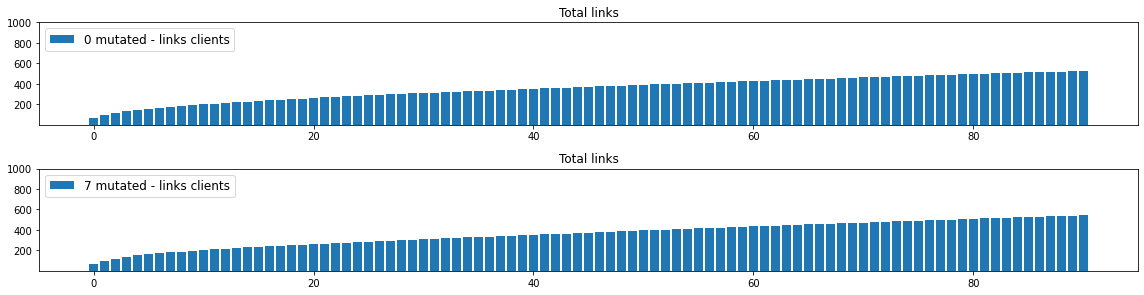

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=2,figsize=(16, 6),gridspec_kw={'height_ratios': [3,3]})
x=0
for i in [0,7]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['mutated']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['mutated']==i]['links'], label='{} mutated - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

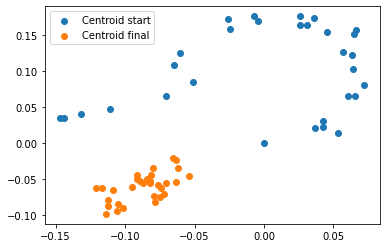

In [25]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

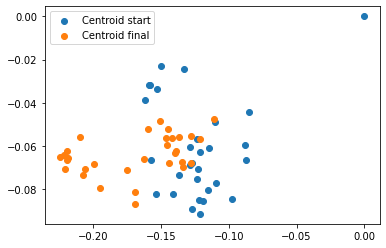

In [26]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [27]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

lag=7


/tmp/ipykernel_59987/1420049761.py:47: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


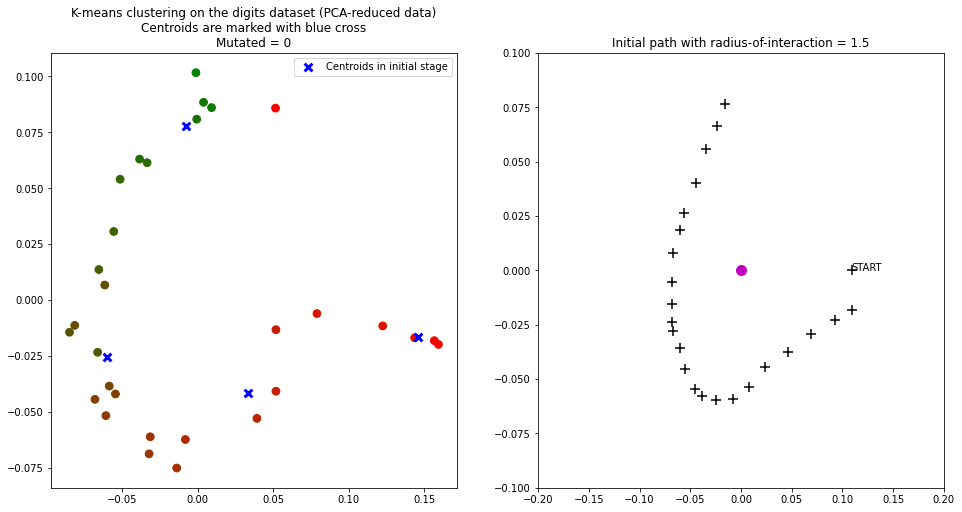

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 0"
)
plt.legend()



plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)

plt.scatter(0,0,marker='o',s=100,color='m')


plt.show()

In [29]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

KeyError: 'movement-steps'

/tmp/ipykernel_59987/1087712571.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


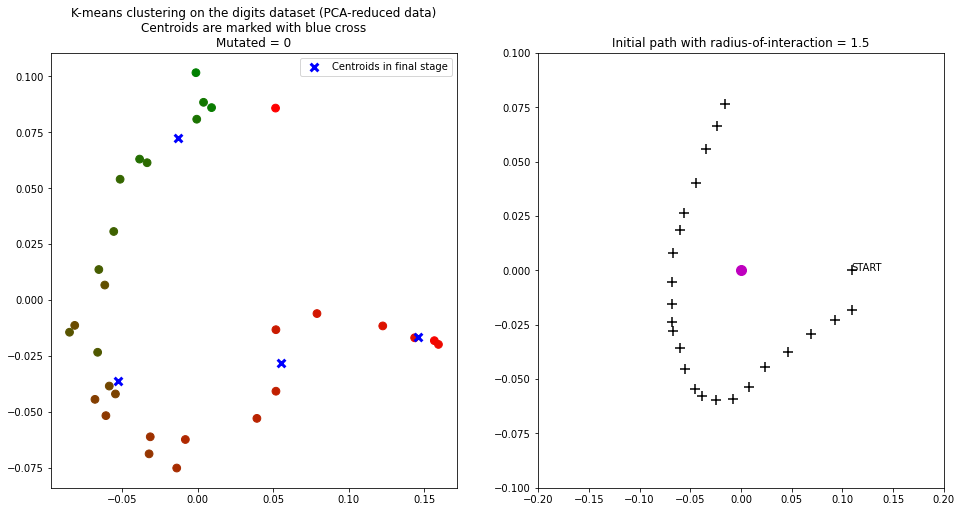

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==0].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 0"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_59987/4003934285.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


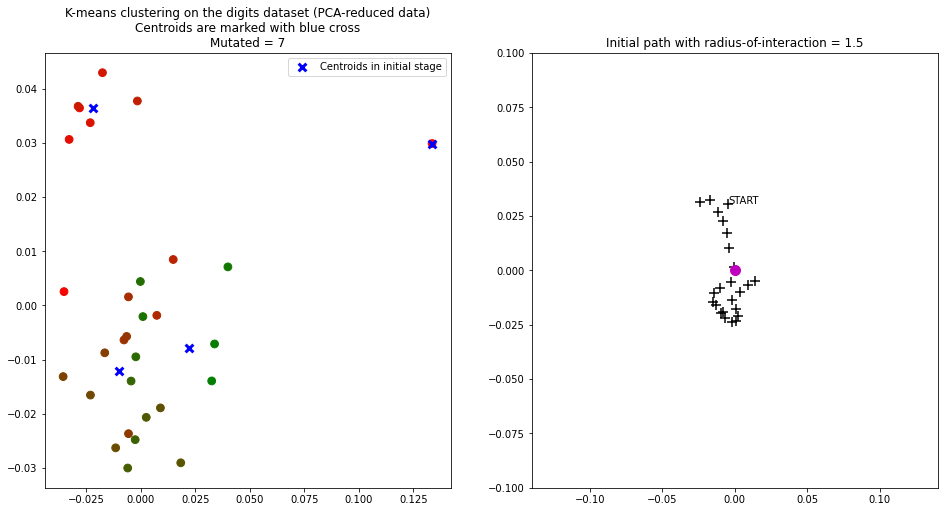

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 7"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.14,0.14)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_59987/332499640.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


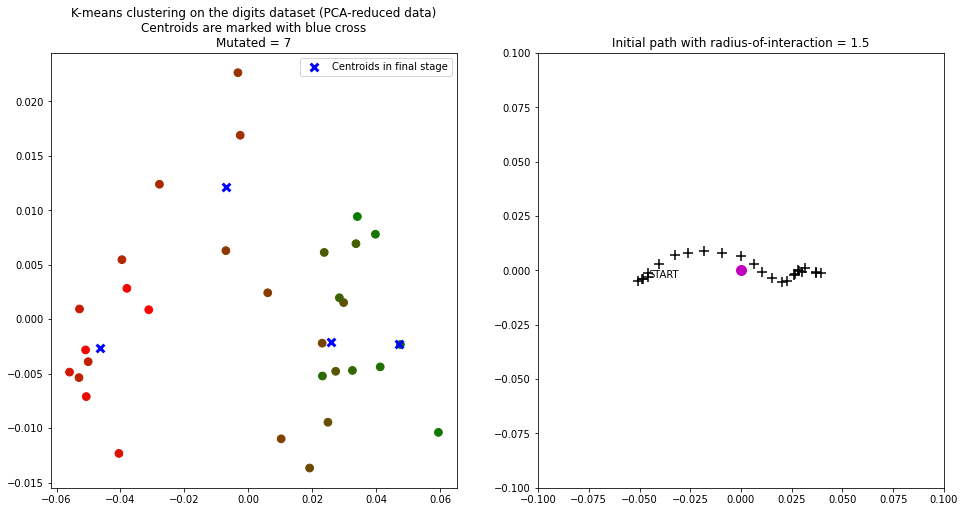

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['mutated']==7].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Mutated = 7"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()